# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [4]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv"
apple = pd.read_csv(url)

### Step 3. Assign it to a variable apple and apply a head()

In [5]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [13]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type and check the info()

In [18]:



apple["Date"] = pd.to_datetime(apple.Date)

apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


### Step 6.  Set the date as the index

In [19]:
apple.set_index("Date", inplace = True)

In [20]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [21]:
apple.index.value_counts().max()


1

In [22]:
apple.index.is_unique

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [25]:
apple.sort_index(ascending = True,inplace = True)
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [26]:
app_final_month = apple.asfreq(freq="BM")
app_final_month

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600.0,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200.0,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400.0,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400.0,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800.0,0.44
...,...,...,...,...,...,...
2014-02-28,529.08,532.75,522.12,526.24,92992200.0,74.76
2014-03-31,539.23,540.81,535.93,536.74,42167300.0,76.25
2014-04-30,592.64,599.43,589.80,590.09,114160200.0,83.83


In [29]:
apple_month = apple.resample("BM").mean()

### Step 10.  What is the difference in days between the first day and the oldest

In [33]:
(apple.index.max() - apple.index.min()).days

12261

In [34]:
apple.index.max()

Timestamp('2014-07-08 00:00:00')

In [36]:
(apple.index[-1] - apple.index[0]).days

12261

### Step 11.  How many months in the data we have?

In [38]:
app_final_month.shape

(403, 6)

(404, 6)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2013-08-30,484.059545,489.319545,480.346818,484.843636,9.157203e+07,67.974545
2013-09-30,482.772500,485.907500,476.861500,480.184500,1.078868e+08,67.419500
2013-10-31,504.148696,508.726957,499.542609,504.744783,8.519274e+07,70.865217
2013-11-29,523.218000,527.830000,520.223000,524.616500,6.531444e+07,74.021000
2013-12-31,560.648095,564.355238,556.405714,559.657619,8.401663e+07,79.034762
2014-01-31,538.100952,542.844762,533.065714,537.445714,1.043566e+08,75.897143
2014-02-28,525.721053,530.773684,522.126316,526.580000,7.737325e+07,74.741053
2014-03-31,533.593333,536.453810,530.070952,533.214286,5.954403e+07,75.750000
2014-04-30,540.081905,544.349048,536.262381,541.074286,7.660787e+07,76.867143


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2013-07-31,454.99,457.34,449.43,452.53,80739400.0,63.12
2013-08-30,492.00,492.95,486.50,487.22,68074300.0,68.41
2013-09-30,477.25,481.66,474.41,476.75,65039100.0,66.94
2013-10-31,525.00,527.49,521.27,522.70,68924100.0,73.39
2013-11-29,549.48,558.33,547.81,556.07,79531900.0,78.53
2013-12-31,554.17,561.28,554.00,561.02,55771100.0,79.23
2014-01-31,495.18,501.53,493.55,500.60,116199300.0,70.69
2014-02-28,529.08,532.75,522.12,526.24,92992200.0,74.76
2014-03-31,539.23,540.81,535.93,536.74,42167300.0,76.25


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

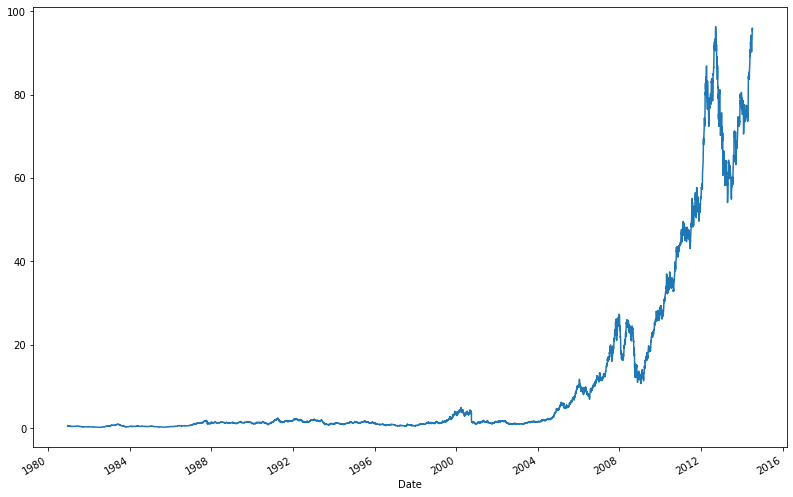

In [39]:
apple["Adj Close"].plot(figsize=(13.5,9))

### BONUS: Create your own question and answer it.